<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 213: Data Science Programming II</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, August 5, 2018</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME: Linh Mai


### A. Assignment Overview
This assignment provides the opportunity for you to practice with the data science in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

1. Write a good comment for each variable, each method, each control branch, and each loop. 
2. Your method comments must mention the purpose of each parameter, and must be grammatically correct.  

### G. Data Sets

This assignment needs the data sets specified in the questions.

### H. Answer the following questions

## Question 1:
In Probability and statistics, the Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space. For instance, the number of pieces of mail received in a day obeys a Poisson distribution. Other examples that may follow a Poisson include the number of phone calls received by a call center per hour and the number of decay events per second from a radioactive source. Mathematically, the probability mass function of the Poisson distribution is defined as:

$P(x= k\ events\ in\ interval)=e^{-\lambda }{\frac {\lambda ^{x}}{x!}}$

Write a function `poisson_pmf(x, lambda)` to compute the pmf of the Poisson distribution. Plot the Poisson distribution pmf in the range(0, 40) with the following lambda: 1, 4, 10, 20.

In [1]:
import math
def poisson_pmf(x, lmbd):
    
    #############YOUR CODE HERE################
    mathEXP = math.exp(-lmbd)
    mathPOW = math.pow(lmbd, x)
    mathFactorial = math.factorial(x)
    
    ##########################################
    
    return mathEXP*mathPOW/mathFactorial

Text(0.5,1,'Poisson distribution graph')

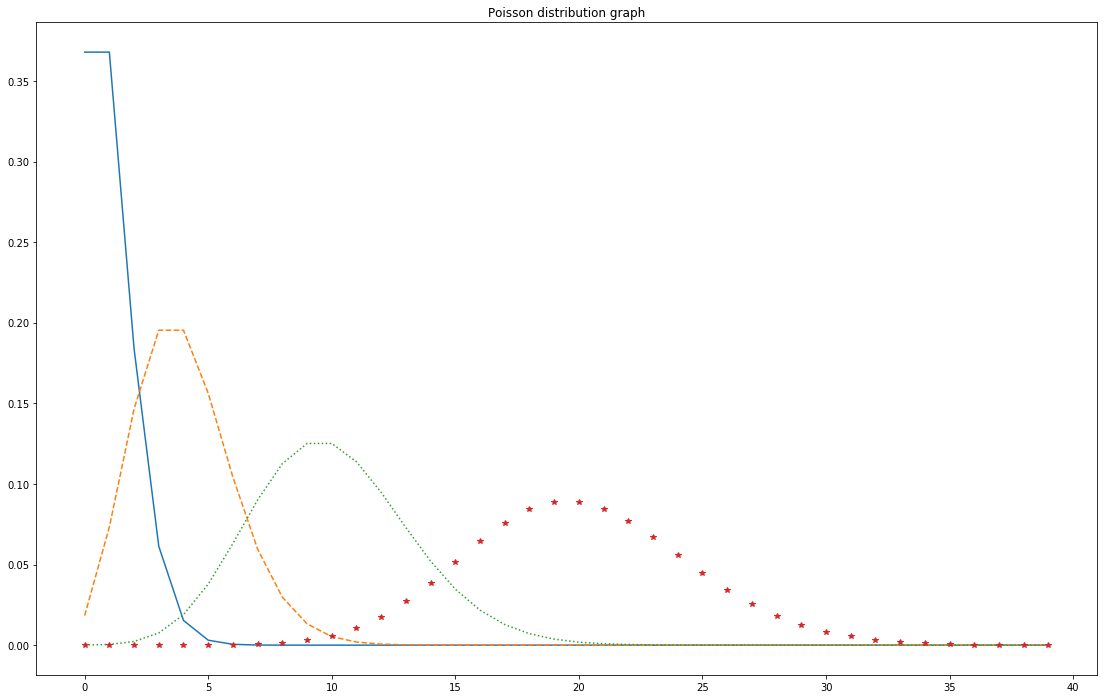

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#############YOUR CODE HERE################
# plot the Poisson PMF
x_range = range(0,40)
plt.figure(figsize = (19,12))
plt.plot(x_range, [poisson_pmf(x,lmbd =1) for x in x_range], '-',label = 'lambda = 1')
plt.plot(x_range, [poisson_pmf(x,lmbd =4) for x in x_range], '--',label = 'lambda = 4') 
plt.plot(x_range, [poisson_pmf(x,lmbd =10) for x in x_range], ':',label = 'lambda = 10') 
plt.plot(x_range, [poisson_pmf(x,lmbd =20) for x in x_range], '*',label = 'lambda = 20') 
plt.title("Poisson distribution graph")
##########################################

## Question 2

Implement a Naive Bayes classification `naiveBayes_classify(word_probs, message)` for classifying an email message into spam or non-spam by using the word probability distributions, word_probs,  learned from a set of training data. 

In this question, you are asked to implement the Naive Bayes method from scratch by implementing the following functions. To simplify the implementation, we assume that any message is equally likely to be spam or not-spam.
* `tokenize(message)`: extracts a set of unique words from the given text message.
* `count_words(training_set)`: creates a dictionary containing the mappings from unique words to the frequencies of the words in 
    spam and non-spam messages in the training set
*  `word_probabilities(counts, total_spams, total_non_spams, k=0.5)`: turns the word_counts into a list of triplets w, p(w | spam) and p(w | ~spam)
* `spam_probability(word_probs, message)`: computes the probablity of spam for the given message.
* `naiveBayes_classify(word_probs, message)`: classifies the message as spam or ham

Using the data set `spam.csv` to evaluate the classification in terms of accuracy, recall, precision, and F1-score.

### Implement the following functions

In [7]:
from collections import Counter, defaultdict
import math,re

def tokenize(message):
    """
    extracts the set of unique words from the given text message
    INPUT:
        message: a piece of text
    OUTPUT:
        a set of unique words
    """
    
    ############YOUR CODE HERE##################
    split_words = message.split()
    return set(split_words)
    
    ############################################

In [8]:
def count_words(training_set):
    """
    creates a dictionary containing the mappings from unique words to the frequencies of the words in 
    spam and non-spam messages in the training set
    INPUT:
        training_set: training set consists of pairs (message, is_spam)
    OUTPUT:
        a map from unique words to their frequencies in spam and non-spam messages
    """
    ############YOUR CODE HERE##################
    word2counts = defaultdict(lambda : [0,0])
    for message, is_spam in training_set:
        tokens = tokenize(message)
        for token in tokens:
            if is_spam:
                word2counts[token][0] += 1
            else:    
                word2counts[token][1] += 1
                
    return word2counts
    ############################################

In [9]:
def word_probabilities(counts, total_spams, total_non_spams, k=0.5):
    """
    turns the word_counts into a list of triplets w, p(w | spam) and p(w | ~spam)
    INPUT:
        counts: a maps from unique words to their frequencies in spam and non-spam messages
        total_spams: the total number of spam messages
        total_non_spams: the total number of non-spam messages
        k=0.5: the smoothing parameter, default 0.5
    OUTPUT:
        a list of triples (w, p(w|spam), p(w|non-spam))
    """
    ############YOUR CODE HERE##################
    calculated_probabilities = [((counts[w][0] + k) / (total_spams + 2*k), (counts[w][1]+k) / (total_non_spams+ 2*k)) for w in counts]    
    ############################################
    return dict(zip(counts.keys(), calculated_probabilities))

In [10]:
def spam_probability(word_probs, message, total_spams, total_non_spams, k):
    """
    computes the probablity of spam for the given message
    INPUT:
        word_probs: a list of triple (w, p(w|spam), p(w|non-spam))
        message: a message under classification
    OUTPUT:
        the probability of being spam for the message
    HINTS:
        First, get a set of unique words in the mesage.
        Second, sum up all the log probabilities of the unique words in the message.
        Third, get probabilities by taking exponentials of the probabilites (for spam and non-spam).
        Finally, return the ratio of probability of spam over the sum of the probabiliy of spam and the 
        probability of not spam.
    """
    ############YOUR CODE HERE##################
    words = tokenize(message)
    log_prob_spam = 0
    log_prob_ham = 0
    for w in word_probs:
        if w in words:
            log_prob_spam += math.log(word_probs[w][0])
            log_prob_ham += math.log(word_probs[w][1])
        else:     
            log_prob_spam += math.log(1- word_probs[w][0])
            log_prob_ham += math.log(1- word_probs[w][1])
            
    not_included = words.difference(set(word_probs.keys()))        
    for w in not_included:
        if w in not_included:
            log_prob_spam += (k / (total_spams + (2*k)))
            log_prob_ham += (k / (total_non_spams + (2*k)))
            
    prob_spam = math.exp(log_prob_spam)
    prob_ham = math.exp(log_prob_ham)
    
    return prob_spam/(prob_spam + prob_ham)
    ############################################

In [11]:
def naiveBayes_classify(word_probs, message, total_spams, total_non_spams, k):
    """
    classifies the message as spam or ham
    INPUT:
        word_probs: a list of triples (w, p(w|spam), p(w|non-spam))
        message: the message under classifiation
    OUTPUT:
        'spam' or 'ham' indicating the classification of the message.
    """
    ############YOUR CODE HERE##################
    if spam_probability(word_probs, message, total_spams, total_non_spams, k) > 0.5:
        return 'spam'
    else:
        return 'ham'
    ############################################

### Test and Evaluate

In [12]:
import pandas as pd
import numpy as np
spam = pd.read_csv("spam.csv", encoding = 'ISO-8859-1')

In [13]:
spam['is_spam'] = spam['label'].map({'spam':1, 'ham':0})

In [14]:
training_set = zip(spam['text'], spam['is_spam'])

In [15]:
counts = count_words(training_set)

In [16]:
total_spams = spam['is_spam'].sum()

In [17]:
total_non_spams = spam.shape[0] - total_spams

In [18]:
word_probs = word_probabilities(counts, total_spams, total_non_spams, 0.5)

In [19]:
y_pred = []
for i in range(spam.shape[0]):
    y_pred.append(naiveBayes_classify(word_probs, spam['text'][i],total_spams, total_non_spams, 0.5))

In [20]:
y_test = spam.label

In [21]:
y_pred_series = pd.Series(y_pred)

### Continue to evaluate the accuracy, recall, precision, and F1-score below

In [22]:
print("The classification accuracy: ", sum(y_test == y_pred_series)/len(y_test))

The classification accuracy:  0.9926417803302225


In [23]:
tp = sum((y_test == 'spam') & (y_pred_series == 'spam'))

fn = sum((y_test == 'spam') & (y_pred_series != 'spam'))

fp= sum((y_test  != 'spam') & (y_pred_series == 'spam'))

tn = sum((y_test != 'spam') & (y_pred_series != 'spam'))

print("recall for class 'spam' = " + str(tp / (tp + fn)))
print("precision for class 'spam' = " + str(tp / (tp + fp)))
print("F1 Score for class 'spam' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'spam' = 0.9491298527443106
precision for class 'spam' = 0.9957865168539326
F1 Score for class 'spam' = 0.971898560657985


In [24]:
tp = sum((y_test == 'ham') & (y_pred_series == 'ham'))

fn = sum((y_test == 'ham') & (y_pred_series != 'ham'))

fp= sum((y_test  != 'ham') & (y_pred_series == 'ham'))

tn = sum((y_test != 'ham') & (y_pred_series != 'ham'))

print("recall for class 'ham' = " + str(tp / (tp + fn)))
print("precision for class 'ham' = " + str(tp / (tp + fp)))
print("F1 Score for class 'ham' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'ham' = 0.9993782383419689
precision for class 'ham' = 0.9921810699588477
F1 Score for class 'ham' = 0.9957666494579246


## Question 3
The data set `news.csv` contains about 422, 000 news article classified into 4 categories: b, e, m, t. Build a Naive Bayes classifier using the MultinomialNB method in the Scikit Learn package. Split the data set into training and set sets using the `train_test_split()` method in Scikit Learn. There are number of vectorizers in the Scikit Learn feature_extraction.text package for creating feature vectors from strings. Use the methods in Scikit Learn metrics package to evaluate the performance of classification.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
news = pd.read_csv("news.csv")

In [27]:
# Map the 'CATEGORY' to numerical values
####### YOUR CODE HERE##########
import string
news['category_num'] = news['CATEGORY'].map({'b':1, 'e':2, 'm' :3, 't':4 })
news['TITLE'] = news.TITLE.map(
    lambda x: x.lower().translate(str.maketrans('','', string.punctuation))
)


In [28]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news['TITLE'], news['CATEGORY'], random_state = 1)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the training and test data 
##########YOUR CODE HERE###########
model_vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english')
training_data = model_vectorizer.fit_transform(X_train)
testing_data = model_vectorizer.transform(X_test)

In [30]:
from sklearn.naive_bayes import MultinomialNB
# Create a MultinomialNB classifier and fit the model
##########YOUR CODE HERE###########
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluate the Model

In [31]:
# Predict the test data
############YOUR CODE HERE############
y_pred = naive_bayes.predict(testing_data)
y_pred


array(['b', 'b', 'e', ..., 'b', 'b', 'm'], dtype='<U1')

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("Precision score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("F1 score: ", f1_score(y_test, y_pred, average = 'weighted'))

Accuracy score:  0.9256001136309834
Recall score:  0.9256001136309834
Precision score:  0.9260891477617142
F1 score:  0.9253746124053914
